In [1]:
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/mental_health_reddit_with_sentiment.csv")

df.shape, df.head()


((570004, 6),
                                           clean_text mental_health_topic  \
 0  life is so pointless without others does anyon...                 bpd   
 1  cold rage hello fellow friends 😄 im on the bpd...                 bpd   
 2  i don’t know who i am my f bf m told me today ...                 bpd   
 3  help opinions advice okay i’m about to open up...                 bpd   
 4  my ex got diagnosed with bpd without going int...                 bpd   
 
    created_utc   nsfw  word_count  sentiment_score  
 0   1650356960  False          80           0.9564  
 1   1650356660  False         518          -0.9907  
 2   1650355379  False         151           0.3400  
 3   1650353430  False         809           0.9969  
 4   1650350635  False         205           0.9896  )

In [4]:
df_sample = df.sample(n=50000, random_state=42)
df_sample.shape


(50000, 6)

In [5]:
tfidf = TfidfVectorizer(
    max_df=0.90,
    min_df=10,
    stop_words="english",
    max_features=8000
)

X = tfidf.fit_transform(df_sample["clean_text"])
X.shape


(50000, 8000)

In [6]:
lda = LatentDirichletAllocation(
    n_components=8,
    random_state=42,
    learning_method="batch",
    max_iter=15
)

lda.fit(X)


,n_components,8
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,15
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [7]:
feature_names = tfidf.get_feature_names_out()

def display_topics(model, feature_names, n_top_words=12):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🧠 Topic {topic_idx + 1}:")
        print(", ".join([
            feature_names[i]
            for i in topic.argsort()[:-n_top_words - 1:-1]
        ]))

display_topics(lda, feature_names)



🧠 Topic 1:
bpd, diagnosed, diagnosis, im, disorder, people, bipolar, mental, help, just, therapist, therapy

🧠 Topic 2:
just, life, im, want, feel, tired, die, dont, like, anymore, music, don

🧠 Topic 3:
walls, hair, dissociation, dae, feel, living, like, dissociating, poem, does, emptiness, im

🧠 Topic 4:
mg, meds, medication, anxiety, taking, effects, im, prescribed, doctor, ve, just, dose

🧠 Topic 5:
tattoo, selfie, characters, tattoos, fictional, iam, carbon, que, la, fidget, swimming, draw

🧠 Topic 6:
just, feel, like, im, want, know, dont, don, people, really, life, love

🧠 Topic 7:
anxiety, like, panic, feel, just, attack, heart, im, anxious, feeling, sleep, ve

🧠 Topic 8:
im, just, like, feel, dont, know, life, time, job, want, work, really


In [8]:
topic_values = lda.transform(X)
df_sample["dominant_topic"] = topic_values.argmax(axis=1)

df_sample["dominant_topic"].value_counts()


dominant_topic
5    17619
7    16225
6     6798
0     4364
3     3415
1     1433
2      112
4       34
Name: count, dtype: int64

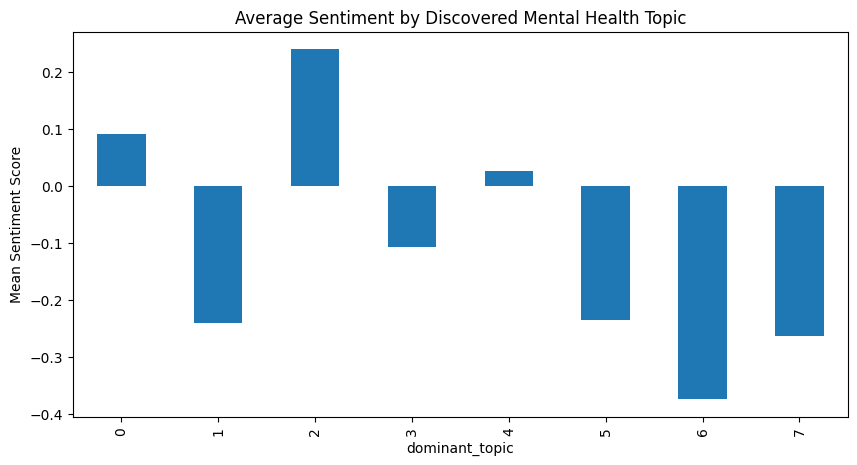

In [9]:
topic_sentiment = df_sample.groupby("dominant_topic")["sentiment_score"].mean()

topic_sentiment.plot(
    kind="bar",
    title="Average Sentiment by Discovered Mental Health Topic",
    figsize=(10, 5)
)

plt.ylabel("Mean Sentiment Score")
plt.show()


In [10]:
df_sample.to_csv("../data/mental_health_reddit_with_sentiment_and_topics.csv", index=False)
print("✅ Topic modeling dataset saved.")


✅ Topic modeling dataset saved.
